In [213]:
import pandas as pd
raw = pd.read_csv('C:\\Users\Selfisher\Desktop\data.csv', '\t')
# this data contains the results from over 300,000 induviduals so it may take a moment or two.

In [214]:
raw.head(5) # Let's see how the data looks like

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [215]:
raw = raw.drop('age', axis=1).drop('engnat', axis=1).drop('race', axis=1).drop('hand', axis=1).drop('source', axis=1)
# droping these columns for now, but the country column might be relevant

In [216]:
raw.head(5)

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
2,2,PK,5,1,1,4,5,1,1,5,...,4,5,5,1,5,1,5,5,5,5
3,2,RO,2,5,2,4,3,4,3,4,...,4,3,5,2,4,2,5,2,5,5
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3


In [217]:
countries = pd.DataFrame(raw['country'].value_counts())
countries.median() # there are alot of countries with very few subjects

country    10.0
dtype: float64

In [218]:
countries = countries.loc[countries['country'] >= 500]
countries.median()

country    1219.0
dtype: float64

In [219]:
len(countries) # so we're left with 6 countries

6

In [220]:
raw = raw.loc[raw['country'].isin(countries.index)] # keep only those countries

In [221]:
len(raw['country'].value_counts()) # seems like it worked!

6

Now the problem is that most skl algorithms dont know how to use strings for their predictions. So, we will split
the column 'country' into 48 columns of countries which will contain ones and zeros:
one if the subjecct is from the column's name (country)
or zero if not.
in each row there sould be exactly one "1".

In [222]:
raw['country'].str.get_dummies()

,AU,CA,GB,IN,PH,US
0,0,0,0,0,0,1
1,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
...,...,...,...,...,...,...
19712,0,0,0,0,0,1
19713,0,0,0,0,0,1
19715,0,0,0,0,0,1
19716,0,0,0,0,0,1


In [223]:
n_data = raw#.join(raw['country'].str.get_dummies(), how='right') # combining the two data frames into a n_data

In [224]:
n_data.head(5)

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3
5,2,US,1,5,2,4,1,3,2,4,...,4,2,1,3,3,5,5,4,5,3
6,2,US,5,1,5,1,5,1,5,4,...,3,1,5,1,4,1,4,3,3,4


In [225]:
n_data = n_data.drop('country', axis=1) # we ahve no use for the 'country' column now

In [226]:
n_data.head(5) 

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,4,2,5,2,5,1,4,3,5,...,4,1,3,1,5,1,4,2,5,5
1,2,2,2,3,3,3,3,1,5,1,...,3,3,3,3,2,3,3,1,3,2
4,2,3,1,3,3,3,1,3,1,3,...,3,1,1,1,3,1,3,1,5,3
5,2,1,5,2,4,1,3,2,4,1,...,4,2,1,3,3,5,5,4,5,3
6,2,5,1,5,1,5,1,5,4,4,...,3,1,5,1,4,1,4,3,3,4


In [227]:
n_data['gender'] = n_data['gender'] - 1 # now 1 is female and 0 is male

In [228]:
n_data = n_data.loc[n_data['gender']!=2]

In [229]:
n_data = n_data.loc[n_data['gender']!=-1]

In [230]:
#n_data.iloc[:, 2:7] = (n_data.iloc[:, 2:7] * 2) ** 2 - 2

In [231]:
#n_data['agreeable_score'] = (n_data['agreeable_score'] * 2)** 3

In [232]:
#n_data['neuroticism_score'] = (n_data['neuroticism_score'] *2)** 2

In [233]:
n_data.head(5)

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0,4,2,5,2,5,1,4,3,5,...,4,1,3,1,5,1,4,2,5,5
1,1,2,2,3,3,3,3,1,5,1,...,3,3,3,3,2,3,3,1,3,2
4,1,3,1,3,3,3,1,3,1,3,...,3,1,1,1,3,1,3,1,5,3
5,1,1,5,2,4,1,3,2,4,1,...,4,2,1,3,3,5,5,4,5,3
6,1,5,1,5,1,5,1,5,4,4,...,3,1,5,1,4,1,4,3,3,4


In [234]:
from sklearn.utils import shuffle

In [235]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [236]:
n_data = shuffle(n_data)

In [237]:
to = 2000
train = n_data[:to]
test = n_data[to:]

In [238]:
trainx = train.drop('gender',axis=1)
trainy = train['gender']

In [239]:
import sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB # best we got is 0.64 accuracy for 0.65 male to female ratio - not good

In [240]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier    # binarize=1.6)- for power trick binarize=0.65-no trick

In [241]:
reg = linear_model.PassiveAggressiveClassifier()

In [242]:
reg = linear_model.RidgeClassifierCV() # best so far 

In [243]:
score = cross_val_score(reg, trainx, trainy, cv=5)

In [244]:
score.mean()

0.696

In [245]:
len(train.loc[train['gender'] == 0]) / len(train.loc[train['gender'] == 1])

0.5797788309636651

In [246]:
from matplotlib import pyplot as plt
import seaborn as sns

In [247]:
mal = n_data.loc[n_data['gender']==0]
fem = n_data.loc[n_data['gender']==1][:len(mal)]
plot_d = fem.append(mal)

In [248]:
len(fem)

5253

In [249]:
len(mal)

5253

In [250]:
#for i in range(10):
#    s = 'A'+str(i+1)
#    sns.FacetGrid(plot_d, col='gender',hue='gender', size=5,).map(sns.histplot, s)             

Now we're looking for information to see which question should get more or less weight

In [251]:
chrs = {'O','C','E','A','N'}
qs = []
diff = []
for c in chrs:
    print(c+' : ')
    for i in range(10):
        s = c+str(i+1)
        print(s+' : '+str(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean())))
        qs.append(s)
        diff.append(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean()))

C : 
C1 : 0.0643441842756518
C2 : 0.0022844089091949016
C3 : 0.006282124500285757
C4 : 0.03521797068341925
C5 : 0.08376166000380758
C6 : 0.003236245954692407
C7 : 0.0883304778221965
C8 : 0.13535122786978881
C9 : 0.2528079192842183
C10 : 0.021321149819150786
O : 
O1 : 0.1610508280982299
O2 : 0.21149819150961324
O3 : 0.056348753093470094
O4 : 0.13516086046068887
O5 : 0.216257376737103
O6 : 0.03483723586521981
O7 : 0.13877784123358072
O8 : 0.21644774414620205
O9 : 0.0051399200456883065
O10 : 0.20788121073672183
N : 
N1 : 0.5650104702075005
N2 : 0.40376927470017154
N3 : 0.40186560060917564
N4 : 0.12811726632400555
N5 : 0.1941747572815533
N6 : 0.4142394822006472
N7 : 0.26403959642109287
N8 : 0.3133447553778792
N9 : 0.24443175328383804
N10 : 0.11897963068722639
A : 
A1 : 0.4005330287454787
A2 : 0.230154197601371
A3 : 0.29373691224062437
A4 : 0.3577003616980776
A5 : 0.3893013516086048
A6 : 0.36264991433466554
A7 : 0.34608794974300405
A8 : 0.30706263087759345
A9 : 0.3620788121073666
A10 : 0.14

In [252]:
weight_df = pd.DataFrame(diff, index=qs, columns={'questions'})
weight_df.head(5)

,questions
C1,0.064344
C2,0.002284
C3,0.006282
C4,0.035218
C5,0.083762


<function matplotlib.pyplot.show(close=None, block=None)>

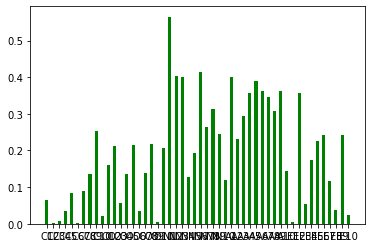

In [253]:
plt.bar(qs,diff, color='g',width=0.5)
plt.show 
#Some questions are more important than others. Let's use that